# Preprocessing Data

##Import Library

melakukan import librarry untuk persiapan praproses data

In [900]:
import numpy as np
import sklearn.metrics as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.svm import SVR
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy import stats
import pyarrow as pa
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras
from tabulate import tabulate
from sklearn.metrics import mean_absolute_percentage_error

##Load Dataaset

In [901]:
# Melakukan Load dataset
ntt = pd.read_csv('https://raw.githubusercontent.com/Arin1206/datasetFPKel10/main/NTT%202015%20-%202022.csv')
ntt.head(10)

,datetime,total_visitor,total_accomodation
0,1/1/2014,22881.0,9024
1,2/1/2014,19794.0,9058
2,3/1/2014,26642.0,9103
3,4/1/2014,33478.0,9187
4,5/1/2014,36289.0,9247
5,6/1/2014,39.1,9271
6,7/1/2014,41911.0,9348
7,8/1/2014,44722.0,9378
8,9/1/2014,47533.0,9400
9,10/1/2014,50344.0,9495


##Display Data Type Information

In [902]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            108 non-null    object 
 1   total_visitor       108 non-null    float64
 2   total_accomodation  108 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


## Data Duplicate Check

In [903]:
jumlah_baris_duplikat = ntt.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


##Missing Values Check

In [904]:
ntt.isnull().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

Didapatkan dari dataset terdapat 0 baris missing value

## Data Type Adjustment

### Change the float data type to integer

In [905]:
# Mengubah kolom 'total visitor' dari float menjadi integer
ntt['total_visitor'] = ntt['total_visitor'].astype(int)

In [906]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            108 non-null    object
 1   total_visitor       108 non-null    int64 
 2   total_accomodation  108 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


### Datetime Formatting

In [907]:
ntt['datetime'] = pd.to_datetime(ntt['datetime'], format='%m/%d/%Y')
ntt.head()

,datetime,total_visitor,total_accomodation
0,2014-01-01,22881,9024
1,2014-02-01,19794,9058
2,2014-03-01,26642,9103
3,2014-04-01,33478,9187
4,2014-05-01,36289,9247


In [908]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            108 non-null    datetime64[ns]
 1   total_visitor       108 non-null    int64         
 2   total_accomodation  108 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 KB


## Outlier Values Check

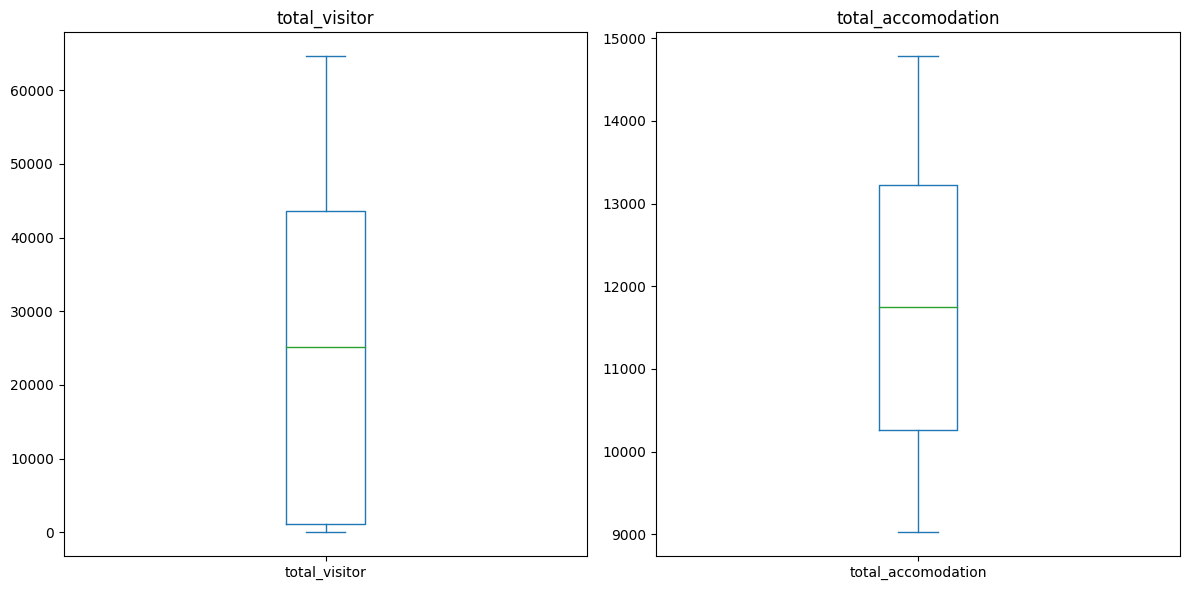

In [909]:
data_check = ['total_visitor', 'total_accomodation']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for i, data in enumerate(data_check):
    ntt[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)
plt.tight_layout()
plt.show()

In [910]:
Q1 = ntt[['total_visitor', 'total_accomodation']].quantile(0.25)
Q3 = ntt[['total_visitor', 'total_accomodation']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ntt[((ntt[['total_visitor', 'total_accomodation']] < lower_bound) | (ntt[['total_visitor', 'total_accomodation']] > upper_bound)).any(axis=1)]

print("Baris dengan outlier:")
print(outliers)

Baris dengan outlier:
Empty DataFrame
Columns: [datetime, total_visitor, total_accomodation]
Index: []


#SVR

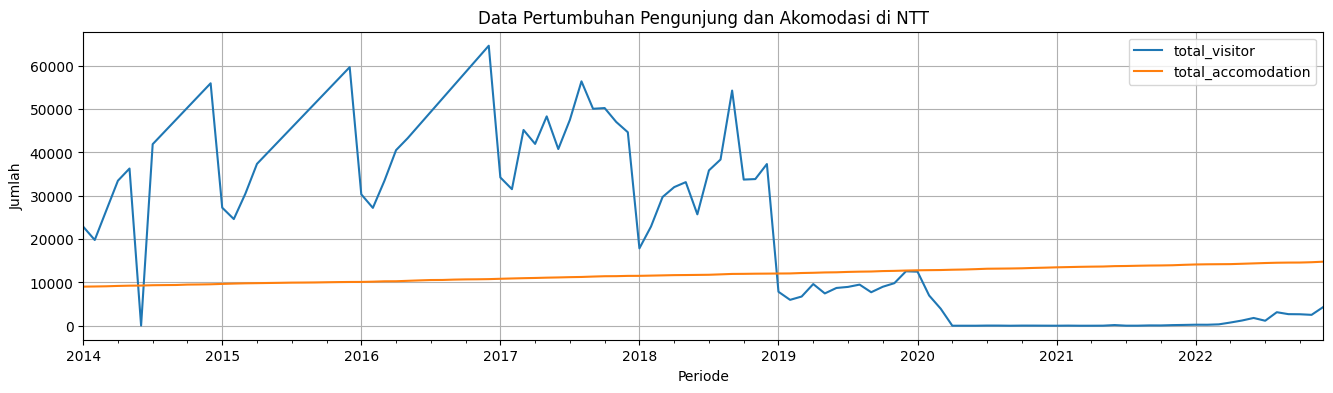

In [911]:
ntt.plot(x='datetime', y=['total_visitor', 'total_accomodation'], figsize=(16, 4), legend=True)
plt.title('Data Pertumbuhan Pengunjung dan Akomodasi di NTT')
plt.grid()
plt.xlabel('Periode')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

In [912]:
# # Keep a certain number of samples
# num_samples_to_keep = 100
# ntt = ntt.head(num_samples_to_keep)

In [913]:
# numeric_columns = ['total_visitor', 'total_accomodation']
# scaler = MinMaxScaler()
# ntt_scaled_svr = ntt.copy()
# ntt_scaled_svr[numeric_columns] = scaler.fit_transform(ntt_scaled_svr[numeric_columns])

In [914]:
# Normalisasi data secara manual
#ntt_scaled_svr[numeric_columns] = (ntt_scaled_svr[numeric_columns] - ntt_scaled_svr[numeric_columns].min()) / (ntt_scaled_svr[numeric_columns].max() - ntt_scaled_svr[numeric_columns].min())

## Shuffle Dataset

In [915]:
# Shuffle the dataset
shuffled_ntt_svr = shuffle(ntt, random_state=3)
X = shuffled_ntt_svr.total_accomodation
y = shuffled_ntt_svr.total_visitor

## 80% Train - 20% Test

### Splitting Train and Test Data

In [916]:
# Assuming 80-20 train-test split
ntt_train80svr = int(0.8 * len(y))
X_train80svr, y_train80svr = X[:ntt_train80svr], y[:ntt_train80svr]
X_test20svr, y_test20svr = X[ntt_train80svr:], y[ntt_train80svr:]

In [917]:
#Mengubah nilai input agar sesuai
X_train80svr = X_train80svr.values.reshape(-1, 1)
X_test20svr = X_test20svr.values.reshape(-1,1)
y_train80svr = y_train80svr.values.reshape(-1, 1)
y_test20svr = y_test20svr.values.reshape(-1,1)

In [918]:
# Display results
lengths = {
    'X_train': len(X_train80svr),
    'y_train': len(y_train80svr),
    'X_test': len(X_test20svr),
    'y_test': len(y_test20svr)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

         Length
X_train      86
y_train      86
X_test       22
y_test       22


### Auto Tuning

In [919]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=3,
    error_score='raise'
)

# Fit the model with the best parameters
grid_search.fit(X_train80svr, y_train80svr)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.547 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.603 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.613 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.071 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.547 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.603 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.613 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kernel=r

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .....C=1, epsilon=0.01, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/3] END ....C=1, epsilon=0.01, kernel=rbf;, score=-0.611 total time=   0.0s
[CV 3/3] END ....C=1, epsilon=0.01, kernel=rbf;, score=-0.070 total time=   0.0s
[CV 1/3] END ...C=1, epsilon=0.1, kernel=linear;, score=0.533 total time=   0.0s
[CV 2/3] END ...C=1, epsilon=0.1, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END ...C=1, epsilon=0.1, kernel=linear;, score=0.599 total time=   0.0s
[CV 1/3] END ......C=1, epsilon=0.1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/3] END .....C=1, epsilon=0.1, kernel=rbf;, score=-0.611 total time=   0.0s
[CV 3/3] END .....C=1, epsilon=0.1, kernel=rbf;, score=-0.070 total time=   0.0s
[CV 1/3] END .....C=1, epsilon=1, kernel=linear;, score=0.533 total time=   0.0s
[CV 2/3] END .....C=1, epsilon=1, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END .....C=1, epsilon=1, kernel=linear;, score=0.599 total time=   0.0s
[CV 1/3] END ........C=1, ep

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .C=10, epsilon=0.01, kernel=linear;, score=0.532 total time=   0.2s
[CV 2/3] END .C=10, epsilon=0.01, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END .C=10, epsilon=0.01, kernel=linear;, score=0.598 total time=   0.0s
[CV 1/3] END ....C=10, epsilon=0.01, kernel=rbf;, score=0.011 total time=   0.0s
[CV 2/3] END ...C=10, epsilon=0.01, kernel=rbf;, score=-0.595 total time=   0.0s
[CV 3/3] END ...C=10, epsilon=0.01, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 1/3] END ..C=10, epsilon=0.1, kernel=linear;, score=0.532 total time=   0.0s
[CV 2/3] END ..C=10, epsilon=0.1, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END ..C=10, epsilon=0.1, kernel=linear;, score=0.598 total time=   0.0s
[CV 1/3] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.011 total time=   0.0s
[CV 2/3] END ....C=10, epsilon=0.1, kernel=rbf;, score=-0.595 total time=   0.0s
[CV 3/3] END ....C=10, epsilon=0.1, kernel=rbf;, score=-0.055 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END ....C=10, epsilon=1, kernel=linear;, score=0.532 total time=   0.2s
[CV 2/3] END ....C=10, epsilon=1, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END ....C=10, epsilon=1, kernel=linear;, score=0.598 total time=   0.0s
[CV 1/3] END .......C=10, epsilon=1, kernel=rbf;, score=0.011 total time=   0.0s
[CV 2/3] END ......C=10, epsilon=1, kernel=rbf;, score=-0.595 total time=   0.0s
[CV 3/3] END ......C=10, epsilon=1, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 1/3] END ...C=10, epsilon=10, kernel=linear;, score=0.532 total time=   0.0s
[CV 2/3] END ...C=10, epsilon=10, kernel=linear;, score=0.608 total time=   0.0s
[CV 3/3] END ...C=10, epsilon=10, kernel=linear;, score=0.598 total time=   0.0s
[CV 1/3] END ......C=10, epsilon=10, kernel=rbf;, score=0.011 total time=   0.0s
[CV 2/3] END .....C=10, epsilon=10, kernel=rbf;, score=-0.595 total time=   0.0s
[CV 3/3] END .....C=10, epsilon=10, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 1/3] END ..C=10, epsilon

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 2/3] END ..C=10, epsilon=100, kernel=linear;, score=0.610 total time=   0.0s
[CV 3/3] END ..C=10, epsilon=100, kernel=linear;, score=0.599 total time=   0.0s
[CV 1/3] END .....C=10, epsilon=100, kernel=rbf;, score=0.011 total time=   0.0s
[CV 2/3] END ....C=10, epsilon=100, kernel=rbf;, score=-0.595 total time=   0.0s
[CV 3/3] END ....C=10, epsilon=100, kernel=rbf;, score=-0.055 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END C=100, epsilon=0.01, kernel=linear;, score=0.520 total time=   0.3s
[CV 2/3] END C=100, epsilon=0.01, kernel=linear;, score=0.634 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END C=100, epsilon=0.01, kernel=linear;, score=0.585 total time=   0.2s
[CV 1/3] END ...C=100, epsilon=0.01, kernel=rbf;, score=0.107 total time=   0.0s
[CV 2/3] END ..C=100, epsilon=0.01, kernel=rbf;, score=-0.436 total time=   0.0s
[CV 3/3] END ...C=100, epsilon=0.01, kernel=rbf;, score=0.082 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .C=100, epsilon=0.1, kernel=linear;, score=0.520 total time=   0.3s
[CV 2/3] END .C=100, epsilon=0.1, kernel=linear;, score=0.634 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=100, epsilon=0.1, kernel=linear;, score=0.585 total time=   1.4s
[CV 1/3] END ....C=100, epsilon=0.1, kernel=rbf;, score=0.107 total time=   0.0s
[CV 2/3] END ...C=100, epsilon=0.1, kernel=rbf;, score=-0.436 total time=   0.0s
[CV 3/3] END ....C=100, epsilon=0.1, kernel=rbf;, score=0.082 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END ...C=100, epsilon=1, kernel=linear;, score=0.520 total time=   0.2s
[CV 2/3] END ...C=100, epsilon=1, kernel=linear;, score=0.634 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, epsilon=1, kernel=linear;, score=0.585 total time=   0.2s
[CV 1/3] END ......C=100, epsilon=1, kernel=rbf;, score=0.107 total time=   0.0s
[CV 2/3] END .....C=100, epsilon=1, kernel=rbf;, score=-0.436 total time=   0.0s
[CV 3/3] END ......C=100, epsilon=1, kernel=rbf;, score=0.082 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END ..C=100, epsilon=10, kernel=linear;, score=0.520 total time=   0.3s
[CV 2/3] END ..C=100, epsilon=10, kernel=linear;, score=0.634 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=100, epsilon=10, kernel=linear;, score=0.585 total time=   1.2s
[CV 1/3] END .....C=100, epsilon=10, kernel=rbf;, score=0.107 total time=   0.0s
[CV 2/3] END ....C=100, epsilon=10, kernel=rbf;, score=-0.436 total time=   0.0s
[CV 3/3] END .....C=100, epsilon=10, kernel=rbf;, score=0.082 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .C=100, epsilon=100, kernel=linear;, score=0.522 total time=   0.4s
[CV 2/3] END .C=100, epsilon=100, kernel=linear;, score=0.633 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=100, epsilon=100, kernel=linear;, score=0.585 total time=   0.4s
[CV 1/3] END ....C=100, epsilon=100, kernel=rbf;, score=0.107 total time=   0.0s
[CV 2/3] END ...C=100, epsilon=100, kernel=rbf;, score=-0.442 total time=   0.0s
[CV 3/3] END ....C=100, epsilon=100, kernel=rbf;, score=0.082 total time=   0.0s
Parameter terbaik: {'C': 0.01, 'epsilon': 100, 'kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

### Create Model

In [920]:
best_param = grid_search.best_params_
# Create SVR model
regressor = SVR(**best_param)

# Fit the SVR model
regressor.fit(X_train80svr, y_train80svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.01, epsilon=100, kernel='linear')

### Prediction

#### Test Set

In [921]:
# Prediksi dengan data test
y_pred80svr = np.round(regressor.predict(X_test20svr)).astype(int)

In [922]:
y_pred80svr

array([51384, 15918, 41030,  7006, 39085, 44032, 30846, 27384, 41927,
       31391, -5101, 46896, 29553, 11259, 42195, 41446, 52229, 11911,
       20887, 50487, 40624, -7986])

In [923]:
def plotting_actual_vs_pred(y_test20svr, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test20svr, color='blue', label='Actual')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Visitor')
    plt.legend()
    plt.show()

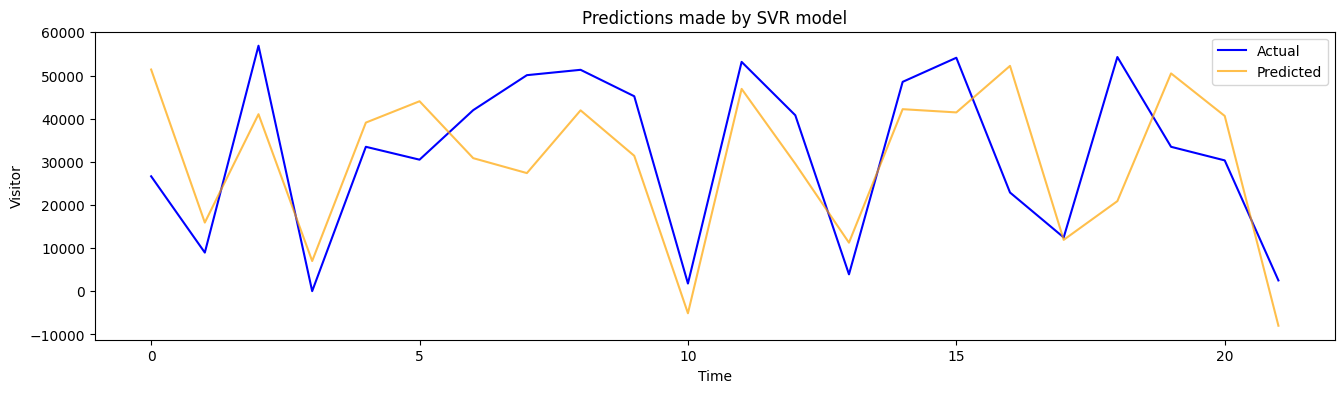

In [924]:
plotting_actual_vs_pred(y_test20svr, y_pred80svr, "Predictions made by SVR model")

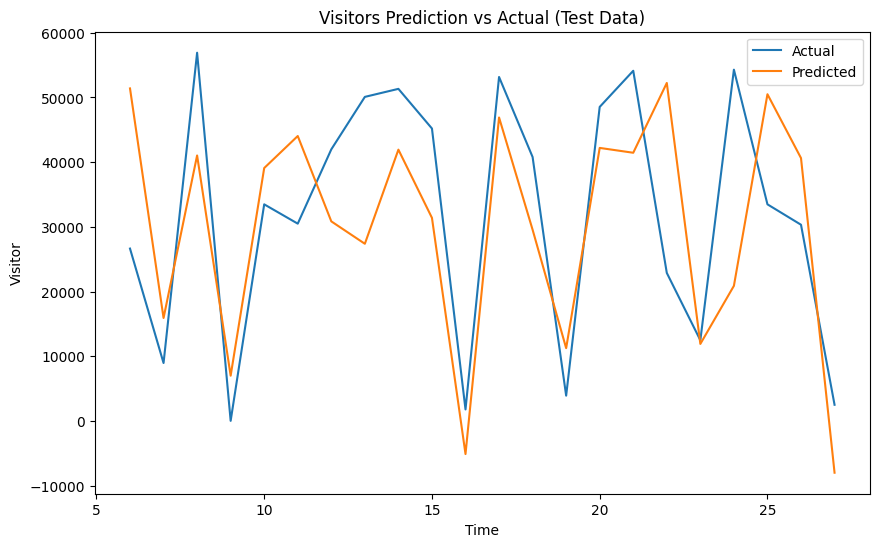

In [925]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_test20svr.shape[0]+sequence_length], y_test20svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred80svr.shape[0]+sequence_length], y_pred80svr, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

#### Train Set

In [926]:
# Prediksi dengan data yang sudah dinormalisasi
y_pred80svr2 = np.round(regressor.predict(X_train80svr)).astype(int)

In [927]:
y_pred80svr2

array([-6726, -4172, 48766, 49589,   712,  6119, 30098, 19669, 40741,
       45507, -7206, 40004,   220, 24467, -3092,  7487, 28859, 43648,
       21966, 47196, -1586, 15298,  4602, 48211,  7786, 34137, 14924,
       42846, -3295, 49846,   -36,  2614, 23633,  1321,  1652,  3383,
       20694, 35943, 20128, 44684, 35772, 26561, 46437, 16869, 20320,
       34885, 25717, 43242, 38946, 33710, 32855, 10009, -2879, 23302,
       13364,  5435, 12541, 10521, 26390,  2935,  9122,  8074, -7089,
       11558,  4003, 42376, 17222, -6020, 22981, 37888, -2441, 25044,
        -506, 32086, 25610, 34372, 28378, 48446, 18632, -9301, 36841,
       13855, 23868, 51865, 19872, 18087])

In [928]:
# # Inverse transform if necessary (e.g., if you scaled the output)
# y_pred80svr = scaler.inverse_transform(np.concatenate([y_pred80svr[:, np.newaxis], np.zeros_like(y_pred80svr[:, np.newaxis])], axis=1))[:, 0]

### Evaluate Model

#### Train Set

In [929]:
# Evaluate the model
mse_80_train = mean_squared_error(y_train80svr, y_pred80svr2)
mae_80_train = mean_absolute_error(y_train80svr, y_pred80svr2)
mape_80_train = mean_absolute_percentage_error(y_train80svr, y_pred80svr2)

print(f"Mean Absolute Error (MAE): {round(mae_80_train, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_80_train, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_80_train, 2)}%")

Mean Absolute Error (MAE): 9733.55
Mean Squared Error (MSE): 170505689.01
Mean Absolute Percentage Error (MAPE): 1.5978876212785574e+18%


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


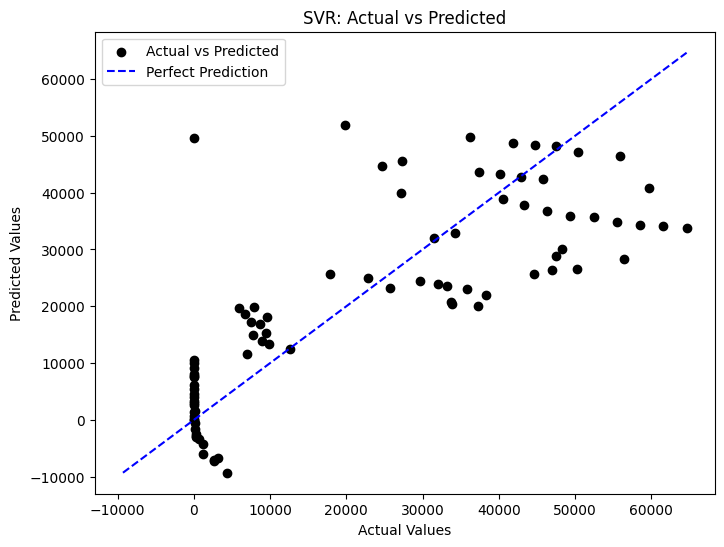

In [930]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_train80svr, y_pred80svr2, color='black', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_train80svr), max(y_pred80svr2))
min_value = min(min(y_train80svr), min(y_pred80svr2))
plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

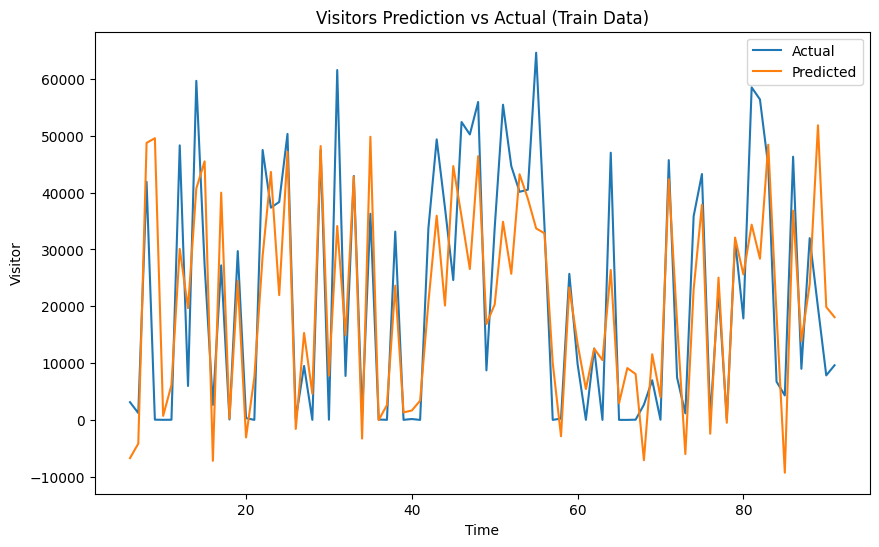

In [931]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_train80svr.shape[0]+sequence_length], y_train80svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred80svr2.shape[0]+sequence_length], y_pred80svr2, label='Predicted')
plt.title('Visitors Prediction vs Actual (Train Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

#### Test Set

In [932]:
# Evaluate the model
mse_80_test = mean_squared_error(y_test20svr, y_pred80svr)
mae_80_test = mean_absolute_error(y_test20svr, y_pred80svr)
mape_80_test = mean_absolute_percentage_error(y_test20svr, y_pred80svr)

print(f"Mean Absolute Error (MAE): {round(mae_80_test, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_80_test, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_80_test, 2)}%")

Mean Absolute Error (MAE): 12842.91
Mean Squared Error (MSE): 229233230.91
Mean Absolute Percentage Error (MAPE): 12.11%


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


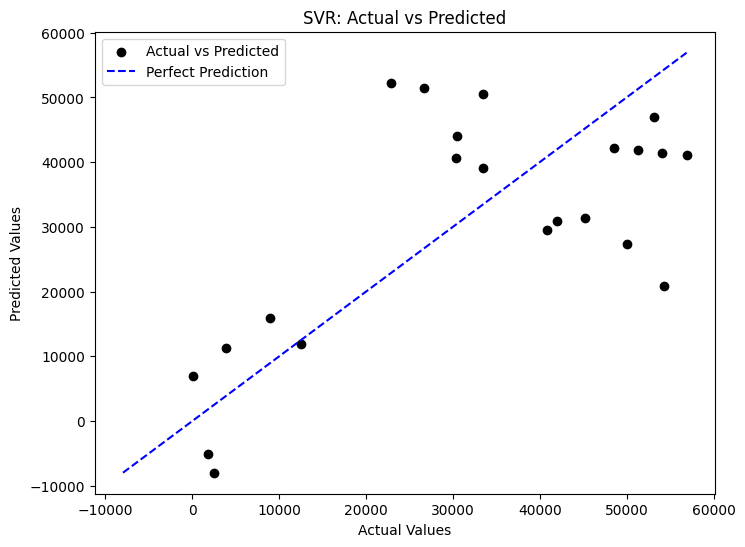

In [933]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test20svr, y_pred80svr, color='black', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test20svr), max(y_pred80svr))
min_value = min(min(y_test20svr), min(y_pred80svr))
plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

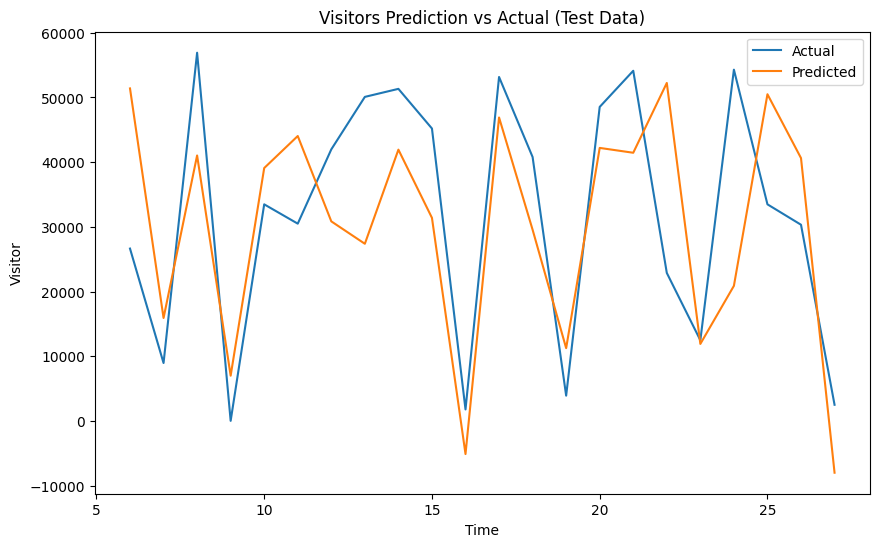

In [934]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_test20svr.shape[0]+sequence_length], y_test20svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred80svr.shape[0]+sequence_length], y_pred80svr, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

### Prediction for the next 12 months

In [935]:
# Mengambil tanggal terakhir dari kolom 'datetime'
last_date = ntt['datetime'].iloc[-1]

# Menambahkan 1 bulan ke tanggal terakhir untuk mendapatkan awal prediksi
start_prediction_date = last_date + pd.DateOffset(months=1)

# Membuat range tanggal untuk prediksi selama 12 bulan ke depan
predict_period_month = pd.date_range(start=start_prediction_date, periods=12, freq='M').tolist()

print(predict_period_month)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


<ipython-input-936-0a6fbeb8ee4d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


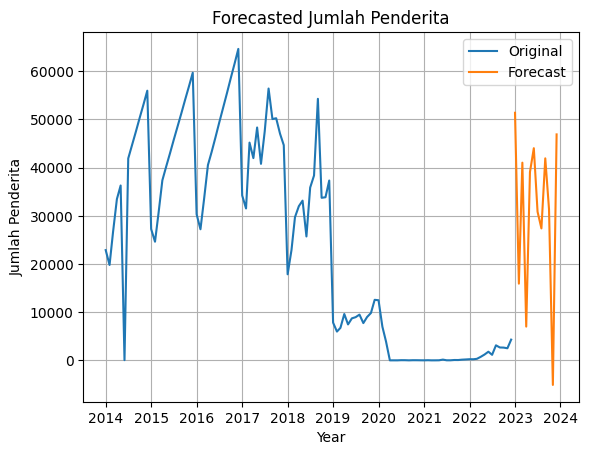

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        51384 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        15918 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        41030 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │         7006 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        39085 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │        44032 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        30846 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        27384 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        41927 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        31391 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        -5101 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [936]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Memastikan panjang forecast_dates dan y_pred80svr sama
min_length = min(len(forecast_dates), len(y_pred80svr))
forecast_dates = forecast_dates[:min_length]
y_pred80svr = y_pred80svr[:min_length]

# Membuat DataFrame
ntt_forecast80svr = pd.DataFrame({'datetime': forecast_dates_1, 'total_visitor': y_pred80svr})

# Melakukan konversi tanggal ke tipe datetime
ntt_forecast80svr['datetime'] = pd.to_datetime(ntt_forecast80svr['datetime'])

# Assuming 'original' contains the original data with 'Datetime' and 'total_visitor' columns
original = ntt[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

# Combine 'original' and 'ntt_forecast80svr' DataFrames
combined_data = pd.concat([original, ntt_forecast80svr])

# Sort the DataFrame by 'Periode'
combined_data = combined_data.sort_values(by='datetime')

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=ntt_forecast80svr, x='datetime', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.grid()
plt.legend()
plt.show()

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred80svr))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

## 70% Train - 30% Test

### Splitting Train and Test Data

In [937]:
# Assuming 80-20 train-test split
ntt_train70svr = int(0.7 * len(y))
X_train70svr, y_train70svr = X[:ntt_train70svr], y[:ntt_train70svr]
X_test30svr, y_test30svr = X[ntt_train70svr:], y[ntt_train70svr:]

In [938]:
#Mengubah nilai input agar sesuai
X_train70svr = X_train70svr.values.reshape(-1, 1)
X_test30svr = X_test30svr.values.reshape(-1,1)

In [939]:
# Display results
lengths = {
    'X_train': len(X_train70svr),
    'y_train': len(y_train70svr),
    'X_test': len(X_test30svr),
    'y_test': len(y_test30svr)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

         Length
X_train      75
y_train      75
X_test       33
y_test       33


### Auto Tuning

In [940]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=3,
    error_score='raise'
)

# Fit the model with the best parameters
grid_search.fit(X_train70svr, y_train70svr)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.480 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.485 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.777 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-1.268 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.799 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.480 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.485 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.777 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-1.268 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kernel=r

### Create Model

In [941]:
best_param = grid_search.best_params_
# Create SVR model
regressor = SVR(**best_param)

# Fit the SVR model
regressor.fit(X_train70svr, y_train70svr)

SVR(C=0.1, epsilon=100, kernel='linear')

### Prediction

#### Test Set

In [942]:
# Prediksi dengan data yang sudah dinormalisasi
y_pred70svr = np.round(regressor.predict(X_test30svr)).astype(int)

In [943]:
y_pred70svr

array([34533, 28510, 48673, 18718, -9348, 37013, 13919, 23979, 52109,
       19963, 18170, 51626, 15991, 41222,  7036, 39268, 44239, 30990,
       27511, 42124, 31537, -5128, 47116, 29691, 11310, 42392, 41641,
       52474, 11964, 20983, 50724, 40814, -8027])

In [944]:
def plotting_actual_vs_pred(y_test30svr, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test30svr, color='blue', label='Actual')
    plt.plot(y_pred, alpha=0.7, color='orange', label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Visitor')
    plt.legend()
    plt.show()

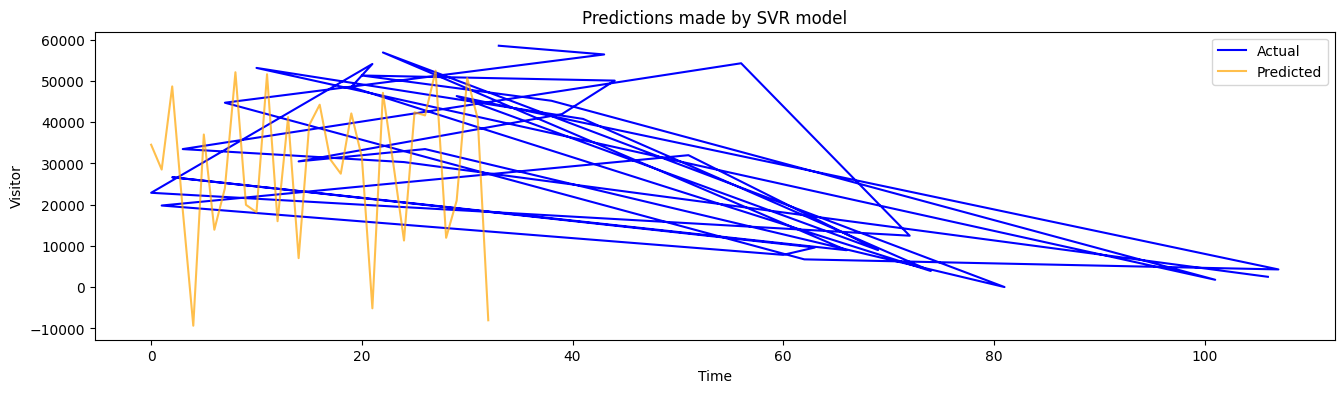

In [945]:
plotting_actual_vs_pred(y_test30svr, y_pred70svr, "Predictions made by SVR model")

#### Train Set

In [946]:
# Prediksi dengan data yang sudah dinormalisasi
y_pred70svr2 = np.round(regressor.predict(X_train70svr)).astype(int)

In [947]:
y_pred70svr2

array([-6760, -4194, 48995, 49822,   712,  6145, 30238, 19759, 40932,
       45721, -7243, 40191,   219, 24580, -3110,  7520, 28993, 43852,
       22068, 47417, -1596, 15368,  4621, 48437,  7820, 34297, 14992,
       43047, -3314, 50080,   -39,  2624, 23743,  1324,  1657,  3397,
       20790, 36111, 20221, 44894, 35939, 26684, 46655, 16946, 20414,
       35048, 25836, 43444, 39128, 33867, 33008, 10053, -2895, 23410,
       13425,  5458, 12598, 10569, 26513,  2946,  9162,  8110, -7125,
       11610,  4019, 42575, 17301, -6052, 23088, 38065, -2455, 25160,
        -512, 32235, 25729])

### Evaluate Model

#### Train Set

In [948]:
# Evaluate the model
mse_70_train = mean_squared_error(y_train70svr, y_pred70svr2)
mae_70_train = mean_absolute_error(y_train70svr, y_pred70svr2)
mape_70_train = mean_absolute_percentage_error(y_train70svr, y_pred70svr2)

print(f"Mean Absolute Error (MAE): {round(mae_70_train, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_70_train, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_70_train, 2)}%")

Mean Absolute Error (MAE): 9072.44
Mean Squared Error (MSE): 153466296.41
Mean Absolute Percentage Error (MAPE): 1.8403509517286794e+18%


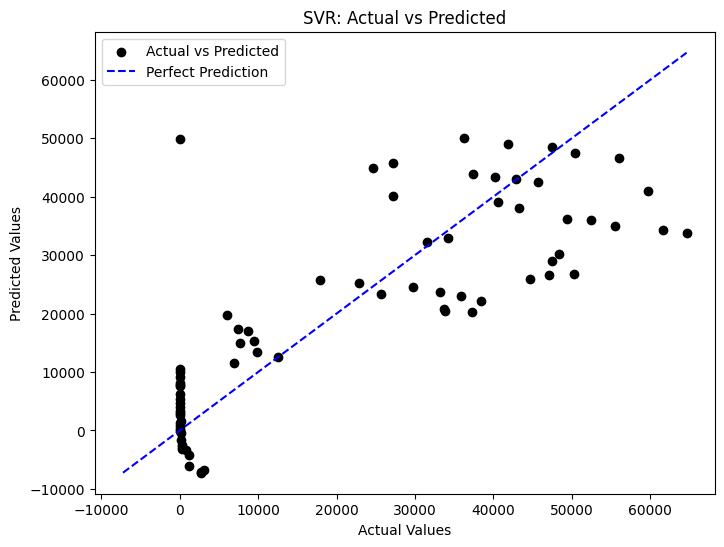

In [949]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_train70svr, y_pred70svr2, color='black', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_train70svr), max(y_pred70svr2))
min_value = min(min(y_train70svr), min(y_pred70svr2))
plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

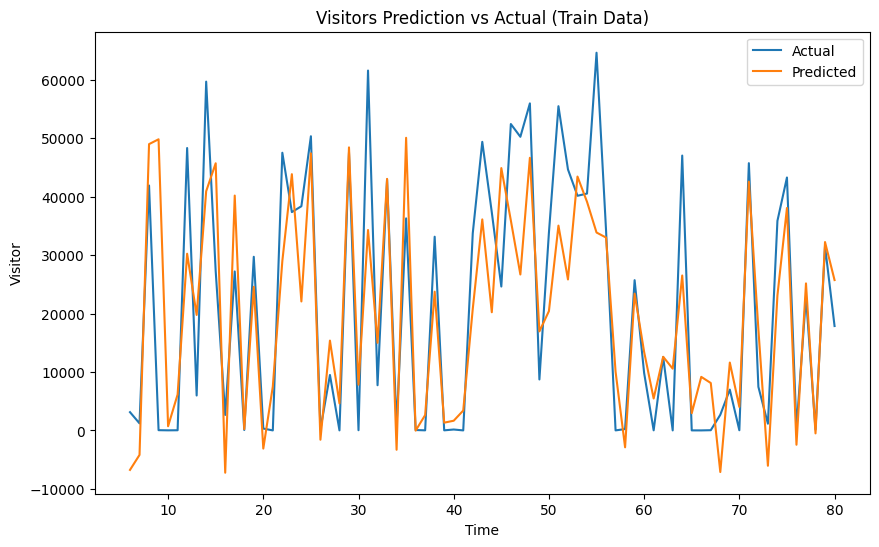

In [950]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_train70svr.shape[0]+sequence_length], y_train70svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred70svr2.shape[0]+sequence_length], y_pred70svr2, label='Predicted')
plt.title('Visitors Prediction vs Actual (Train Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

#### Test Set

In [951]:
# Evaluate the model
mse_70_test = mean_squared_error(y_test30svr, y_pred70svr)
mae_70_test = mean_absolute_error(y_test30svr, y_pred70svr)
mape_70_test = mean_absolute_percentage_error(y_test30svr, y_pred70svr)

print(f"Mean Absolute Error (MAE): {round(mae_70_test, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_70_test, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_70_test, 2)}%")

Mean Absolute Error (MAE): 13306.39
Mean Squared Error (MSE): 248207120.45
Mean Absolute Percentage Error (MAPE): 8.44%


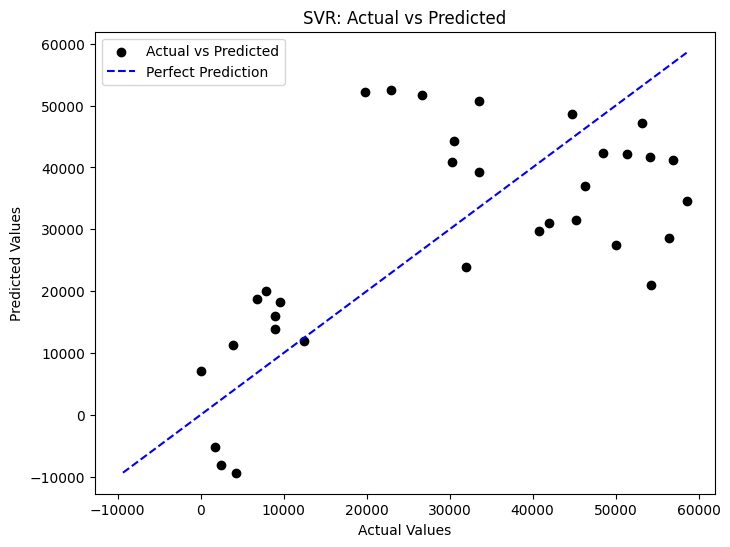

In [952]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test30svr, y_pred70svr, color='black', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test30svr), max(y_pred70svr))
min_value = min(min(y_test30svr), min(y_pred70svr))
plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

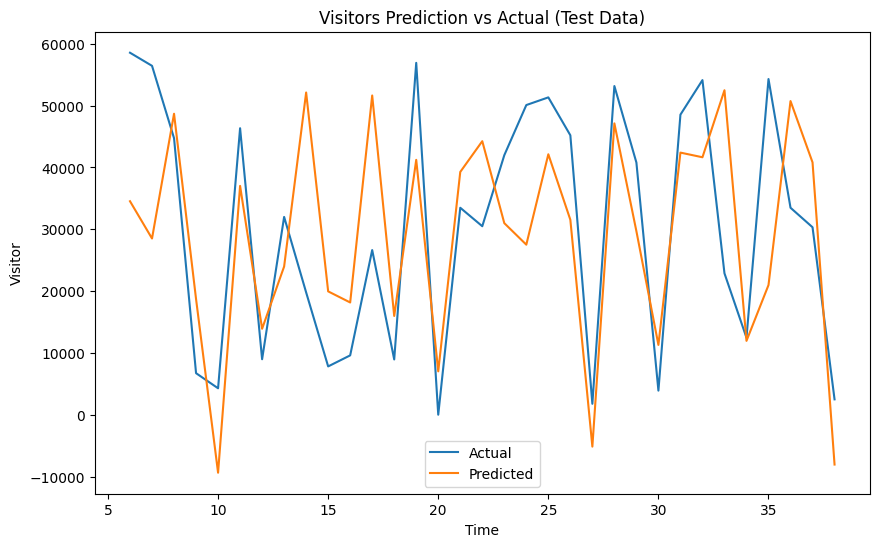

In [953]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_test30svr.shape[0]+sequence_length], y_test30svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred70svr.shape[0]+sequence_length], y_pred70svr, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

### Prediction for the next 12 months

In [954]:
# Mengambil tanggal terakhir dari kolom 'datetime'
last_date = ntt['datetime'].iloc[-1]

# Menambahkan 1 bulan ke tanggal terakhir untuk mendapatkan awal prediksi
start_prediction_date = last_date + pd.DateOffset(months=1)

# Membuat range tanggal untuk prediksi selama 12 bulan ke depan
predict_period_month = pd.date_range(start=start_prediction_date, periods=12, freq='M').tolist()

print(predict_period_month)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


<ipython-input-955-7e2eb9ab7190>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


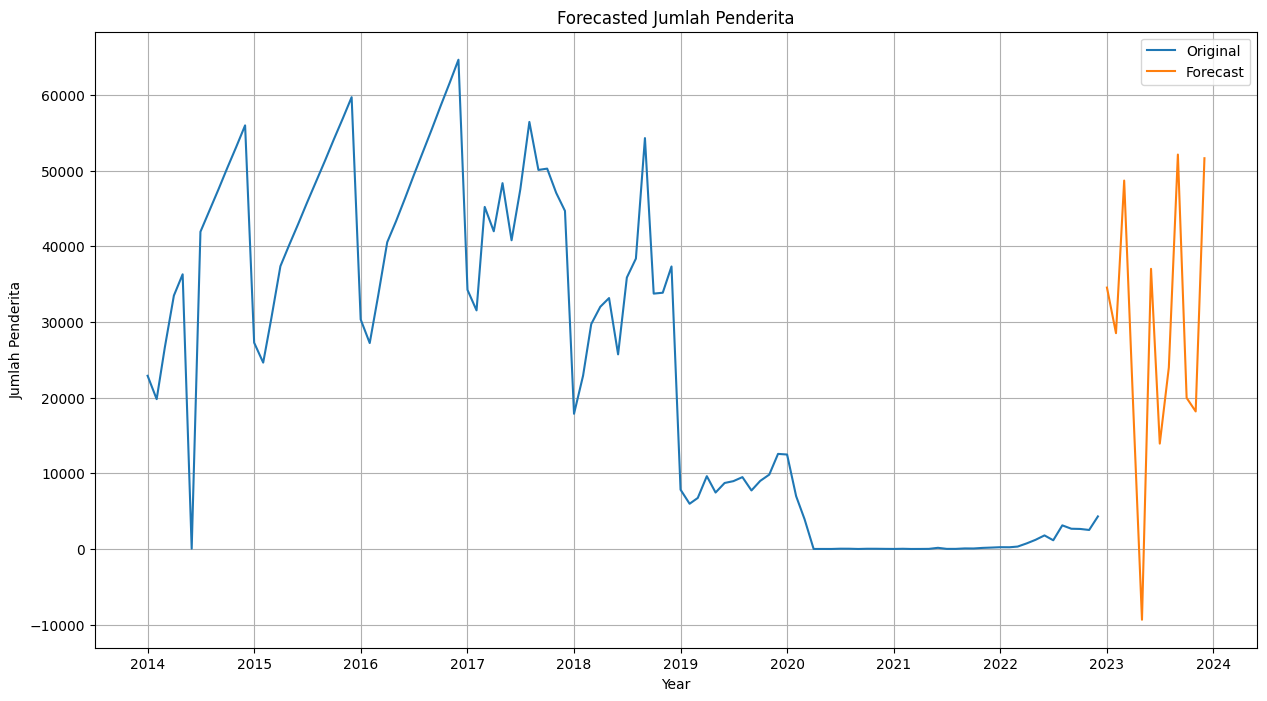

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        34533 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        28510 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        48673 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        18718 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        -9348 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │        37013 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        13919 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        23979 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        52109 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        19963 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        18170 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [955]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Memastikan panjang forecast_dates dan y_pred80svr sama
min_length = min(len(forecast_dates), len(y_pred70svr))
forecast_dates = forecast_dates[:min_length]
y_pred70svr = y_pred70svr[:min_length]

# Membuat DataFrame
ntt_forecast70svr = pd.DataFrame({'datetime': forecast_dates_1, 'total_visitor': y_pred70svr})

# Melakukan konversi tanggal ke tipe datetime
ntt_forecast70svr['datetime'] = pd.to_datetime(ntt_forecast70svr['datetime'])

# Assuming 'original' contains the original data with 'Datetime' and 'total_visitor' columns
original = ntt[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

# Combine 'original' and 'ntt_forecast80svr' DataFrames
combined_data = pd.concat([original, ntt_forecast80svr])

# Sort the DataFrame by 'Periode'
combined_data = combined_data.sort_values(by='datetime')

plt.figure(figsize=(15, 8))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=ntt_forecast70svr, x='datetime', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.grid()
plt.legend()
plt.show()

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred70svr))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

In [956]:
# # Membuat DataFrame dari hasil prediksi
# result_df = pd.DataFrame({'y_pred': y_pred80svr})

# # Mengambil 12 data pertama dari DataFrame result_df
# result_df = result_df.head(12)

# # Membulatkan nilai dalam kolom 'y_pred' menjadi integer
# result_df['y_pred'] = result_df['y_pred'].round().astype(int)

# result_df

In [957]:
# new_dates = pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
#                             '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'])
# df_periode = pd.DataFrame({'Periode': new_dates})
# df_periode

In [958]:
# # Mengonversi indeks result_df menjadi kolom 'Periode'
# result_df['Periode'] = result_df.index

# # Menggabungkan DataFrame result_df dan df_periode menggunakan pd.concat
# result1 = pd.concat([df_periode, result_df[['y_pred']]], axis=1)

# result1

## 60% Train - 40% Test

### Splitting Train and Test Data

In [959]:
# Assuming 80-20 train-test split
ntt_train60svr = int(0.6 * len(y))
X_train60svr, y_train60svr = X[:ntt_train60svr], y[:ntt_train60svr]
X_test40svr, y_test40svr = X[ntt_train60svr:], y[ntt_train60svr:]

In [960]:
#Mengubah nilai input agar sesuai
X_train60svr = X_train60svr.values.reshape(-1, 1)
X_test40svr = X_test40svr.values.reshape(-1,1)

In [962]:
# Display results
lengths = {
    'X_train': len(X_train60svr),
    'y_train': len(y_train60svr),
    'X_test': len(X_test40svr),
    'y_test': len(y_test40svr)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

         Length
X_train      64
y_train      64
X_test       44
y_test       44


### Auto Tuning

In [963]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=3,
    error_score='raise'
)

# Fit the model with the best parameters
grid_search.fit(X_train60svr, y_train60svr)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.422 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.675 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.676 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.495 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.422 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.675 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.676 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.495 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kernel=r

### Create Model

In [964]:
best_param = grid_search.best_params_
# Create SVR model
regressor = SVR(**best_param)

# Fit the SVR model
regressor.fit(X_train60svr, y_train60svr)

SVR(C=0.01, epsilon=0.01, kernel='linear')

### Prediction

#### Test Set

In [965]:
# Prediksi dengan data yang sudah dinormalisasi
y_pred60svr = np.round(regressor.predict(X_test40svr)).astype(int)

In [966]:
y_pred60svr

array([ 3907, 42799, 17305, -6252, 23142, 38250, -2623, 25232,  -663,
       32370, 25806, 34687, 28611, 48951, 18734, -9576, 37189, 13893,
       24041, 52417, 19990, 18182, 51929, 15983, 41435,  6951, 39463,
       44478, 31113, 27604, 42344, 31666, -5320, 47380, 29803, 11261,
       42615, 41857, 52785, 11922, 21019, 51019, 41023, -8244])

In [967]:
def plotting_actual_vs_pred(y_test40svr, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test20svr, color='blue', label='Actual')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Visitor')
    plt.legend()
    plt.show()

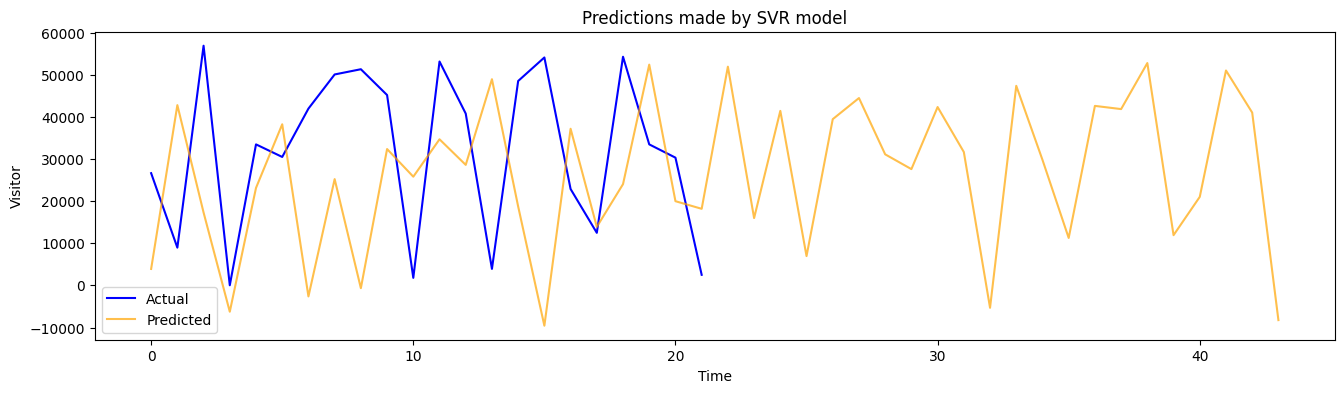

In [968]:
plotting_actual_vs_pred(y_test40svr, y_pred60svr, "Predictions made by SVR model")

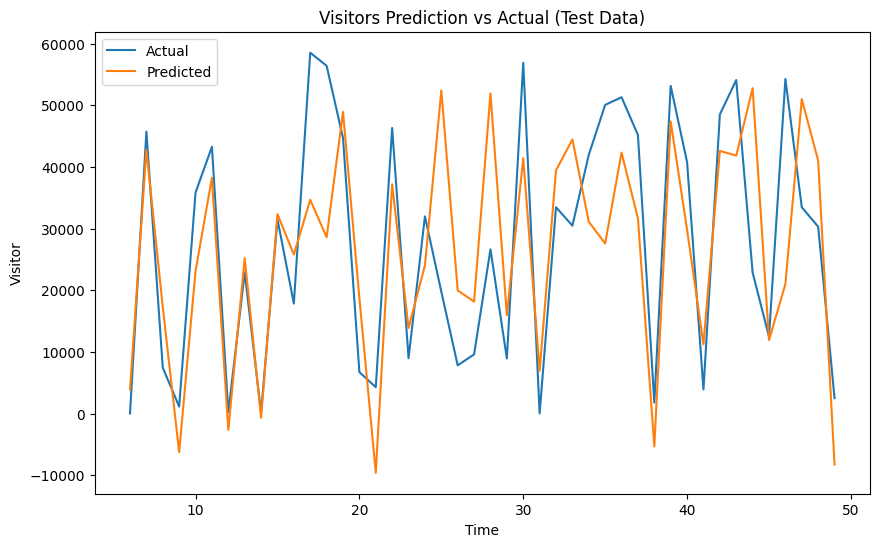

In [969]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_test40svr.shape[0]+sequence_length], y_test40svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred60svr.shape[0]+sequence_length], y_pred60svr, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

#### Train Set

In [970]:
# Prediksi dengan data yang sudah dinormalisasi
y_pred60svr2 = np.round(regressor.predict(X_train60svr)).astype(int)

In [971]:
y_pred60svr2

array([-6966, -4378, 49276, 50110,   572,  6052, 30355, 19785, 41142,
       45972, -7454, 40395,    73, 24648, -3284,  7438, 29099, 44088,
       22113, 47684, -1757, 15355,  4514, 48713,  7741, 34449, 14976,
       43276, -3490, 50370,  -187,  2499, 23803,  1189,  1525,  3279,
       20824, 36279, 20250, 45139, 36106, 26770, 46915, 16947, 20445,
       35207, 25915, 43676, 39323, 34016, 33149,  9994, -3067, 23467,
       13395,  5359, 12561, 10514, 26597,  2824,  9095,  8034, -7335,
       11564])

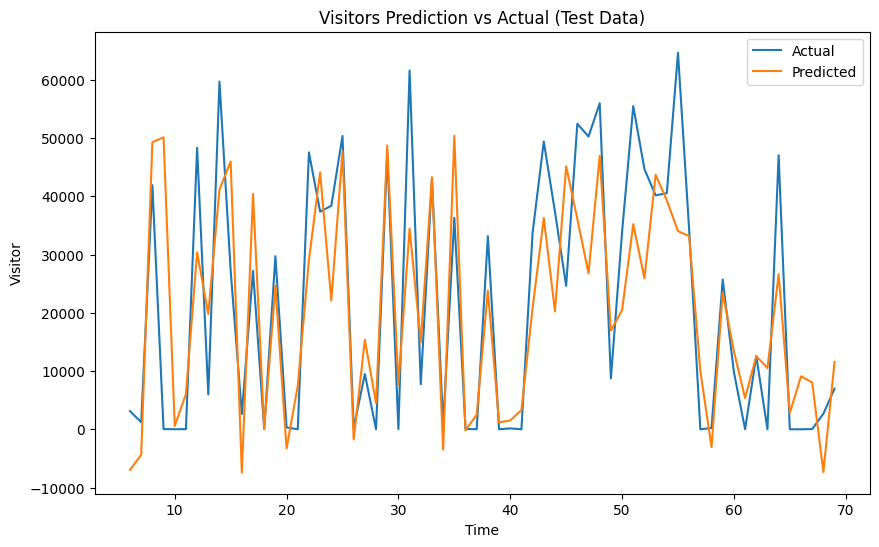

In [972]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_train60svr.shape[0]+sequence_length], y_train60svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred60svr2.shape[0]+sequence_length], y_pred60svr2, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

### Evaluate Model

#### Train Set

In [973]:
# Evaluate the model
mse_60_train = mean_squared_error(y_train60svr, y_pred60svr2)
mae_60_train = mean_absolute_error(y_train60svr, y_pred60svr2)
mape_60_train = mean_absolute_percentage_error(y_train60svr, y_pred60svr2)

print(f"Mean Absolute Error (MAE): {round(mae_60_train, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_60_train, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_60_train, 2)}%")

Mean Absolute Error (MAE): 9747.11
Mean Squared Error (MSE): 173004613.95
Mean Absolute Percentage Error (MAPE): 2.1340025359318385e+18%


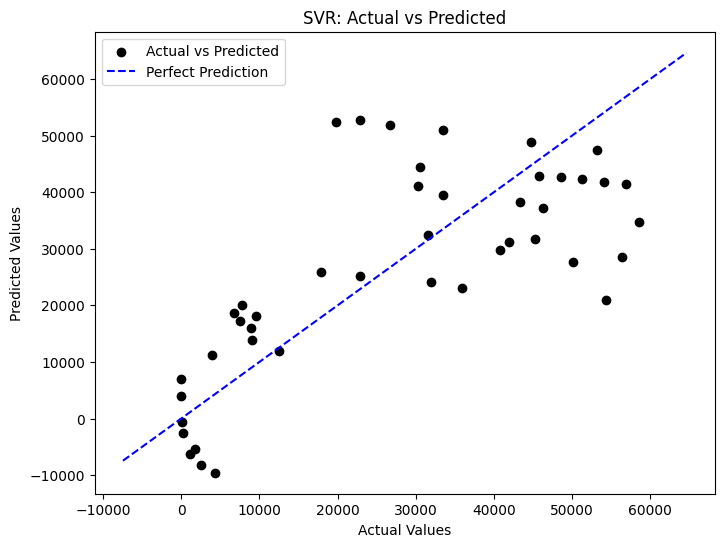

In [974]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test40svr, y_pred60svr, color='black', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_train60svr), max(y_pred60svr2))
min_value = min(min(y_train60svr), min(y_pred60svr2))
plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

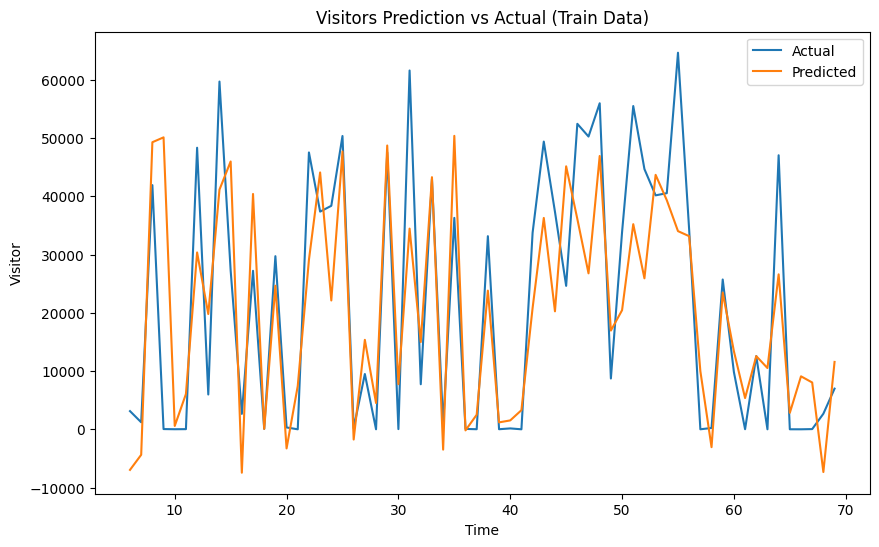

In [975]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_train60svr.shape[0]+sequence_length], y_train60svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred60svr2.shape[0]+sequence_length], y_pred60svr2, label='Predicted')
plt.title('Visitors Prediction vs Actual (Train Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

#### Test Set

In [976]:
# Evaluate the model
mse_60_test = mean_squared_error(y_test40svr, y_pred60svr)
mae_60_test = mean_absolute_error(y_test40svr, y_pred60svr)
mape_60_test = mean_absolute_percentage_error(y_test40svr, y_pred60svr)

print(f"Mean Absolute Error (MAE): {round(mae_60_test, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_60_test, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_60_test, 2)}%")

Mean Absolute Error (MAE): 11279.61
Mean Squared Error (MSE): 197032349.57
Mean Absolute Percentage Error (MAPE): 10.27%


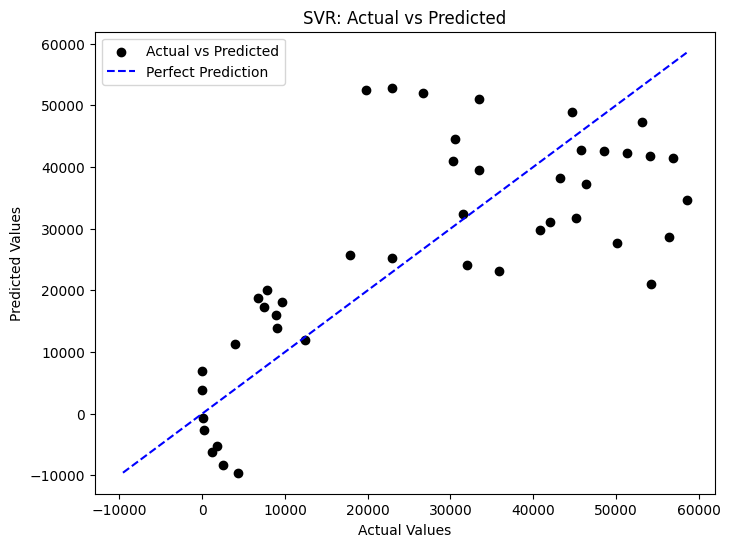

In [977]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test40svr, y_pred60svr, color='black', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test40svr), max(y_pred60svr))
min_value = min(min(y_test40svr), min(y_pred60svr))
plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

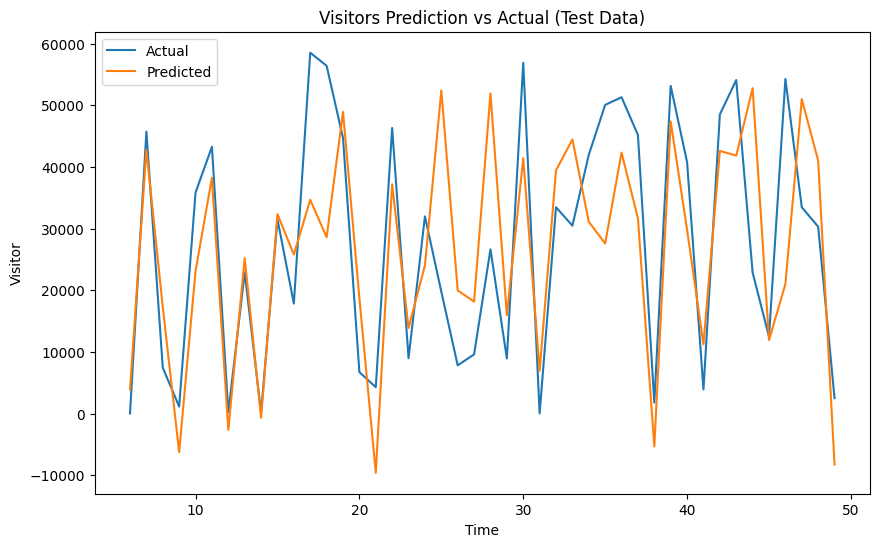

In [978]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari test set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_test40svr.shape[0]+sequence_length], y_test40svr, label='Actual')
plt.plot(ntt.index[sequence_length:y_pred60svr.shape[0]+sequence_length], y_pred60svr, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

### Prediction for the next 12 months

In [979]:
# Mengambil tanggal terakhir dari kolom 'datetime'
last_date = ntt['datetime'].iloc[-1]

# Menambahkan 1 bulan ke tanggal terakhir untuk mendapatkan awal prediksi
start_prediction_date = last_date + pd.DateOffset(months=1)

# Membuat range tanggal untuk prediksi selama 12 bulan ke depan
predict_period_month = pd.date_range(start=start_prediction_date, periods=12, freq='M').tolist()

print(predict_period_month)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


<ipython-input-980-c4d491b3b401>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


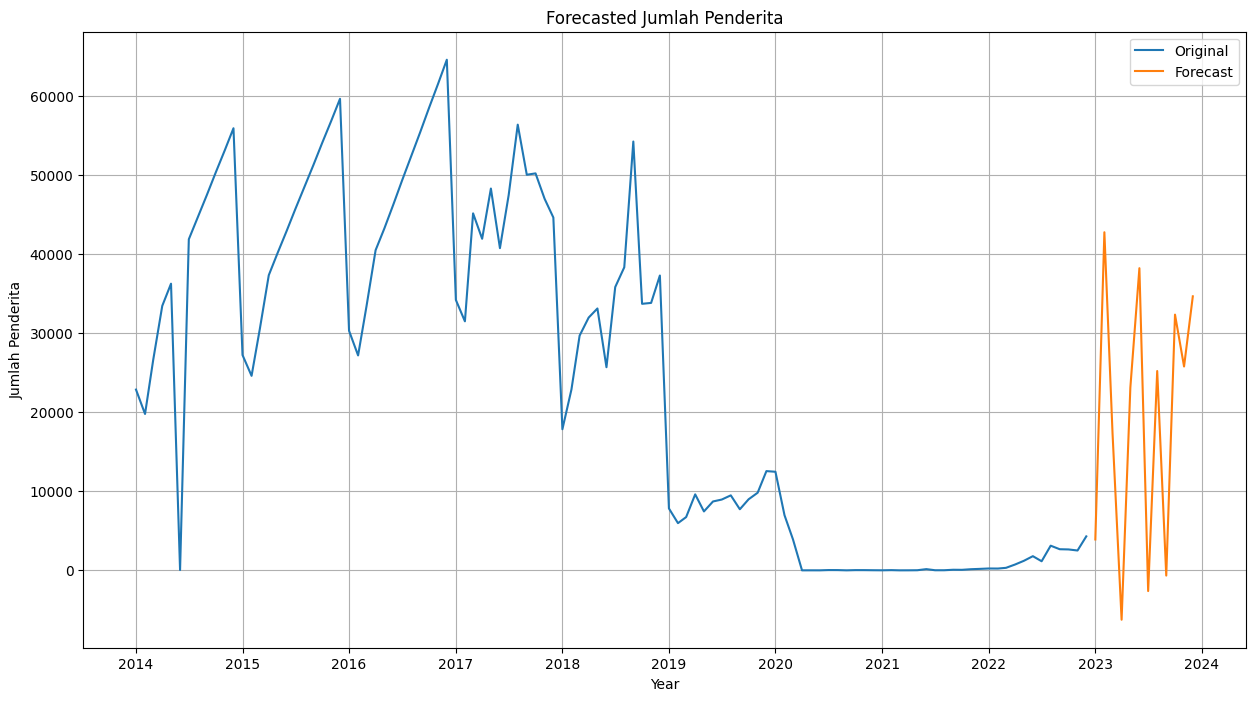

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │         3907 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        42799 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        17305 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        -6252 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        23142 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │        38250 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        -2623 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        25232 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │         -663 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        32370 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        25806 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [980]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Memastikan panjang forecast_dates dan y_pred80svr sama
min_length = min(len(forecast_dates), len(y_pred60svr))
forecast_dates = forecast_dates[:min_length]
y_pred60svr = y_pred60svr[:min_length]

# Membuat DataFrame
ntt_forecast60svr = pd.DataFrame({'datetime': forecast_dates_1, 'total_visitor': y_pred60svr})

# Melakukan konversi tanggal ke tipe datetime
ntt_forecast60svr['datetime'] = pd.to_datetime(ntt_forecast60svr['datetime'])

# Assuming 'original' contains the original data with 'Datetime' and 'total_visitor' columns
original = ntt[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

# Combine 'original' and 'ntt_forecast80svr' DataFrames
combined_data = pd.concat([original, ntt_forecast60svr])

# Sort the DataFrame by 'Periode'
combined_data = combined_data.sort_values(by='datetime')

plt.figure(figsize=(15, 8))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=ntt_forecast60svr, x='datetime', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.grid()
plt.legend()
plt.show()

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred60svr))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

# Conclusion

In [981]:
# Define the data for each scenario
scenario_data = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'RNN Train 80',
        'MSE': mse_80_train,
        'MAE': mae_80_train,
        'MAPE (%)': mape_80_train
    },
    {
    'Scenario': 'Scenario 1',
        'Model': 'RNN Test 80',
        'MSE': mse_80_test,
        'MAE': mae_80_test,
        'MAPE (%)': mape_80_test
    },
   {
        'Scenario': 'Scenario 2',
        'Model': 'RNN Train 70',
        'MSE': mse_70_train,
        'MAE': mae_70_train,
        'MAPE (%)': mape_70_train
    },
    {
    'Scenario': 'Scenario 2',
        'Model': 'RNN Test 70',
        'MSE': mse_70_test,
        'MAE': mae_70_test,
        'MAPE (%)': mape_70_test
    },
     {
        'Scenario': 'Scenario 3',
        'Model': 'RNN Train 60',
        'MSE': mse_60_train,
        'MAE': mae_60_train,
        'MAPE (%)': mape_60_train
    },
    {
    'Scenario': 'Scenario 3',
        'Model': 'RNN Test 60',
        'MSE': mse_60_test,
        'MAE': mae_60_test,
        'MAPE (%)': mape_60_test
    },
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(scenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table4 = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table4)

╒════════════╤══════════════╤═════════════╤══════════╤══════════════╕
│ Scenario   │ Model        │         MSE │      MAE │     MAPE (%) │
╞════════════╪══════════════╪═════════════╪══════════╪══════════════╡
│ Scenario 1 │ RNN Train 80 │ 1.70506e+08 │  9733.55 │  1.59789e+18 │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 1 │ RNN Test 80  │ 2.29233e+08 │ 12842.9  │ 12.1119      │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 2 │ RNN Train 70 │ 1.53466e+08 │  9072.44 │  1.84035e+18 │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 2 │ RNN Test 70  │ 2.48207e+08 │ 13306.4  │  8.44264     │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 3 │ RNN Train 60 │ 1.73005e+08 │  9747.11 │  2.134e+18   │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 3 │ RNN Test 60  │ 1.97032e+08 │ 11279.6  │ 10.2696      │
╘════════════╧══════